<a href="https://colab.research.google.com/github/badriadhikari/2019-Fall-AI/blob/master/MODULE-I/Example2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 2: Regression
* We would like to predict 'age' from diagnostic measures and 'known diabetes labels' (The Pima Indians Diabetes Database) 
* Dataset: [rawdata](https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/pima-indians-diabetes.data.csv) and [Reference](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Step 1: Load data and split

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

dataset = np.loadtxt("https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/pima-indians-diabetes.data.csv", delimiter=",")
print(dataset.shape)

# First 7 column and the last column are inputs
# 7th column will be the ground truth (age)
XTRAIN = dataset[:700,[0,1,2,3,4,5,6,8]]
YTRAIN = dataset[:700,7]
XVALIDATION = dataset[700:,[0,1,2,3,4,5,6,8]]
YVALIDATION = dataset[700:,7]

Using TensorFlow backend.


(768, 9)


## Step 2: Preview first 5 rows

In [2]:
print(XTRAIN.shape, YTRAIN.shape)
print(XVALIDATION.shape, YVALIDATION.shape)
print('Train:')
print(XTRAIN[0:5,])
print(YTRAIN[0:5])
print('Validation:')
print(XVALIDATION[0:5,])
print(YVALIDATION[0:5])

(700, 8) (700,)
(68, 8) (68,)
Train:
[[6.00 148.00 72.00 35.00 0.00 33.60 0.63 1.00]
 [1.00 85.00 66.00 29.00 0.00 26.60 0.35 0.00]
 [8.00 183.00 64.00 0.00 0.00 23.30 0.67 1.00]
 [1.00 89.00 66.00 23.00 94.00 28.10 0.17 0.00]
 [0.00 137.00 40.00 35.00 168.00 43.10 2.29 1.00]]
[50.00 31.00 32.00 21.00 33.00]
Validation:
[[2.00 122.00 76.00 27.00 200.00 35.90 0.48 0.00]
 [6.00 125.00 78.00 31.00 0.00 27.60 0.56 1.00]
 [1.00 168.00 88.00 29.00 0.00 35.00 0.91 1.00]
 [2.00 129.00 0.00 0.00 0.00 38.50 0.30 0.00]
 [4.00 110.00 76.00 20.00 100.00 28.40 0.12 0.00]]
[26.00 49.00 52.00 41.00 27.00]


## Step 3: Normalize

In [0]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVALIDATION -= mean
XVALIDATION /= std

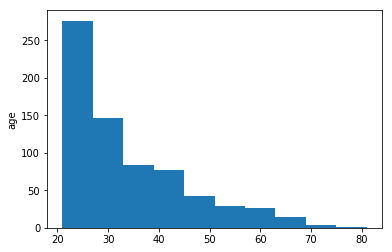

In [4]:
# Normalize the output?
plt.hist(YTRAIN)
plt.ylabel('age')
plt.show()

## Step 4: Check obvious correlations

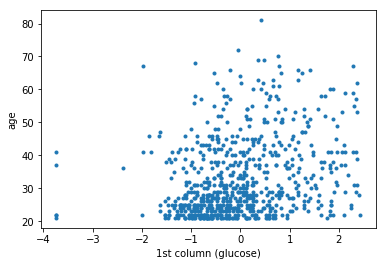

In [5]:
plt.plot(XTRAIN[:, 1], YTRAIN, '.')
plt.xlabel('1st column (glucose)')
plt.ylabel('age')
plt.show()

Should we do this for all input features?

## Step 5: Fit a model

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = len(XTRAIN[0,:]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

# mse = mean squared error (loss)
# mae = mean absolute error (metric)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# validation data is NOT USED for training
history = model.fit(XTRAIN, YTRAIN, epochs=50, batch_size=10, validation_data=(XVALIDATION, YVALIDATION))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None



Train on 700 samples, validate on 68 samples
Epoch 1/50
700/700 [==============================] - 0s 459us/step - loss: 1176.7459 - mean_absolute_error: 32.2523 - val_loss: 1214.6339 - val_mean_absolute_error: 32.9904
Epoch 2/50
700/700 [==============================] - 0s 122us/step - loss: 1060.1292 - mean_absolute_error: 30.4129 - val_loss: 1073.7737 - val_mean_absolu

## Step 6: Check the learning curves

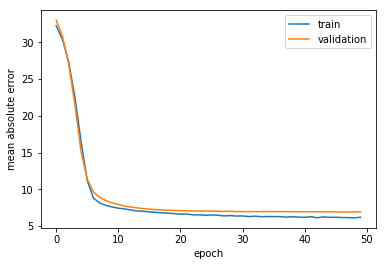

In [7]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

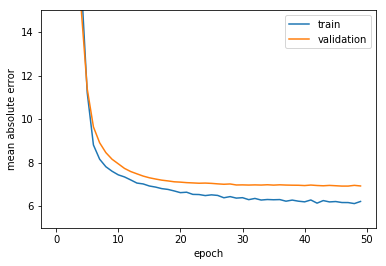

In [8]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylabel('mean absolute error')
plt.ylim(5, 15)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Should we train more?** When to stop?

## Step 7: Evaluate on validation set

In [9]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f" % (model.metrics_names[1], scores[1]))

68/68 [==============================] - 0s 90us/step

mean_absolute_error: 6.92


## Step 8: Assess Predictions

In [10]:
print(YVALIDATION[0:5])

prediction = model.predict(XVALIDATION)

print(prediction[0:5])

[26.00 49.00 52.00 41.00 27.00]
[[24.37]
 [36.70]
 [31.77]
 [35.25]
 [30.22]]


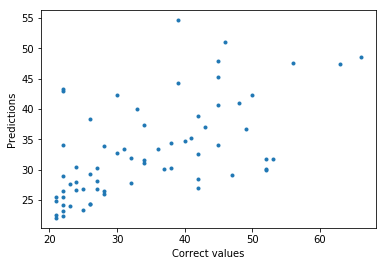

In [11]:
plt.plot(YVALIDATION, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

## Step 9: Calculate MAE & MSE

In [12]:
mae = mean_absolute_error(YVALIDATION, prediction)
print(mae)

6.924213493571562


In [13]:
mse = mean_squared_error(YVALIDATION, prediction)
print(mse)

87.08791568947521


## How can the performance be improved?  
* Increase the number of epochs to 100 or 150 
* Add more layers into the neural networks 
* Use other loss functions such as mean_squared_logarithmic_error; see [keras losses](https://keras.io/losses/)